In [61]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
np.shape(x_train)

(60000, 28, 28)

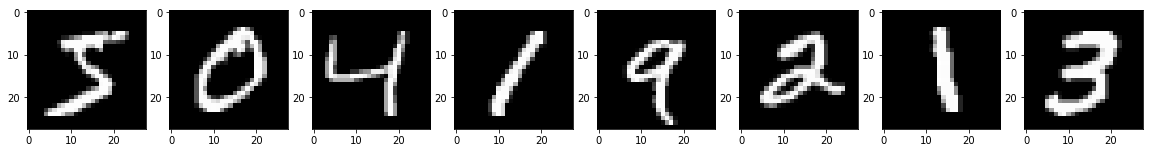

In [63]:
from matplotlib import pyplot as plt

columns = 8
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [64]:
y_train[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [65]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[:3]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [66]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [67]:
x_train_norm = x_train_1D.astype('float32')
x_train_norm = x_train_norm/255

In [71]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(28*28,), activation='sigmoid', name='layer_1'))
model.add(Dense(units=10, activation='softmax', name='layer_2'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
print model.summary()

train_history = model.fit(x=x_train_norm, y=y_train_onehot, epochs=10, batch_size=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
layer_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 1.9356 - acc: 0.5670
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 1.3756 - acc: 0.7613
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.0345 - acc: 0.8058
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.8389 - acc: 0.8281
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.7194 - acc: 0.8434
Epoch 6/10
60000/60000 [=====

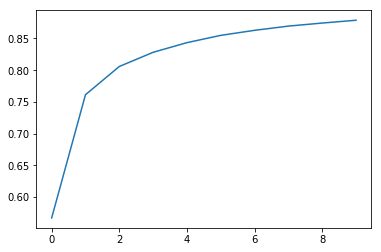

In [72]:
plt.plot(train_history.history['acc'])

# Test

In [73]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_1D = x_test_1D.astype('float32')
x_test_norm = x_test_1D/255

In [74]:
y_test_onehot = np_utils.to_categorical(y_test) 

In [75]:
model.evaluate(x=x_test_norm, y=y_test_onehot)

10000/10000 [==============================] - 1s 51us/step


[0.45249762659072879, 0.88849999999999996]

In [76]:
model.predict(x_test_norm[0:1,:])

array([[  1.19165948e-03,   1.27747306e-04,   5.16801083e-04,
          2.56763306e-03,   1.20784983e-03,   1.27818040e-03,
          5.16730870e-05,   9.74634826e-01,   6.03628403e-04,
          1.78200249e-02]], dtype=float32)

In [77]:
y_pred = model.predict_classes(x_test_norm)

## classification report

In [78]:
from sklearn.metrics import classification_report

target_names = [ "Class {}".format(i) for i in range(np.max(y_test) + 1) ]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.91      0.97      0.94       980
    Class 1       0.93      0.97      0.95      1135
    Class 2       0.90      0.84      0.87      1032
    Class 3       0.87      0.88      0.88      1010
    Class 4       0.87      0.91      0.89       982
    Class 5       0.87      0.80      0.83       892
    Class 6       0.89      0.92      0.90       958
    Class 7       0.90      0.88      0.89      1028
    Class 8       0.85      0.84      0.84       974
    Class 9       0.87      0.85      0.86      1009

avg / total       0.89      0.89      0.89     10000



## confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 955,    0,    3,    3,    0,    8,    8,    1,    2,    0],
       [   0, 1102,    2,    4,    0,    1,    4,    0,   22,    0],
       [  14,   13,  869,   22,   16,    0,   29,   22,   41,    6],
       [   5,    1,   20,  893,    0,   33,    7,   19,   25,    7],
       [   2,    8,    6,    0,  892,    2,   15,    1,    8,   48],
       [  19,    6,    5,   58,   18,  713,   25,   10,   28,   10],
       [  17,    3,   15,    2,   17,   23,  878,    0,    3,    0],
       [   4,   27,   24,    3,   12,    0,    1,  909,    5,   43],
       [  12,   14,   14,   35,   13,   24,   16,   12,  816,   18],
       [  17,    9,    7,    8,   54,   12,    1,   34,    9,  858]])